## MNIST dataset

### Loading the MNIST dataset in Keras

In [15]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [16]:
import keras


In [17]:
import tensorflow
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [18]:
train_labels.shape

(60000,)

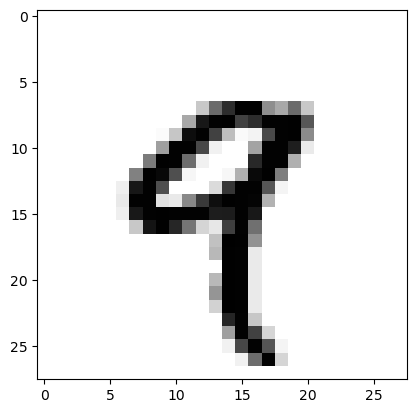

In [19]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [20]:
train_images[0].shape

(28, 28)

In [21]:
train_images.shape

(60000, 28, 28)

In [22]:
test_images.shape

(10000, 28, 28)

### Reshape the data

**Why we reshape the data? What is the potential problem?**

In [23]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255    ## default type is float64
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [24]:
train_images.shape

(60000, 784)

In [25]:
temp = train_images[0]
temp.shape   ## This is a tuple. 

(784,)

**The network architecture**

In [26]:
# will show an error

# from tensorflow import keras
# model = keras.Sequential([
#    layers.Dense(512, activation="relu"),
#    layers.Dense(10, activation="softmax")
# ])

In [27]:
model = keras.Sequential([
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [28]:
from keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**The compilation step** \
rmsprop: root mean squared propagation, a variant of stochastic gradient descent with back propagation \
loss: cross-entropy for multiple categories \
metric: display in the training and validation (not for optimization)

In [29]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
## please get used to "modifier" (method for class) 

In [30]:
## error: weights haven't been created
## model.weights

In [31]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8747 - loss: 0.4400
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9654 - loss: 0.1170
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9779 - loss: 0.0743
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9853 - loss: 0.0515
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9898 - loss: 0.0366


In [32]:
model.summary() ## (784+1)*512= 401920 (512+1)*10=5130

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 814,102 (3.11 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 407,052 (1.55 MB)

In [33]:
model.weights

[<KerasVariable shape=(784, 512), dtype=float32, path=sequential_3/dense_6/kernel>,
 <KerasVariable shape=(512,), dtype=float32, path=sequential_3/dense_6/bias>,
 <KerasVariable shape=(512, 10), dtype=float32, path=sequential_3/dense_7/kernel>,
 <KerasVariable shape=(10,), dtype=float32, path=sequential_3/dense_7/bias>]

In [34]:
type(model.weights[0])

keras.src.backend.tensorflow.core.Variable

**Using the model to make predictions**

In [21]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 129ms/step


array([4.0163970e-09, 6.5485853e-11, 8.8553161e-06, 1.0437955e-05,
       4.4308567e-12, 2.5483031e-08, 5.6966889e-14, 9.9998027e-01,
       9.3775675e-08, 2.2032589e-07], dtype=float32)

In [22]:
test_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [23]:
model(test_digits)[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([4.0163970e-09, 6.5485853e-11, 8.8553161e-06, 1.0437955e-05,
       4.4308398e-12, 2.5482983e-08, 5.6966889e-14, 9.9998027e-01,
       9.3775675e-08, 2.2032589e-07], dtype=float32)>

In [24]:
predictions.shape

(10, 10)

In [25]:
predictions[0].argmax()

7

In [26]:
predictions[0][predictions[0].argmax()]

0.9999803

In [27]:
test_labels[0]

7

In [28]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0649 - accuracy: 0.9810
test_acc: 0.9810000061988831


## Classifying movie reviews: A binary classification example

## The IMDB dataset

**Loading the IMDB dataset**

In [29]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [30]:
type(train_data)

numpy.ndarray

In [31]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [32]:
print(len(train_data[0]))
print(len(train_data[1]))

218
189


In [33]:
train_labels[0] ## 0 stands for negative and 1 stands for positive 

1

In [34]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [35]:
word_index = imdb.get_word_index()
type(word_index)

dict

In [36]:
list(word_index.keys())[0:10]

['fawn',
 'tsukino',
 'nunnery',
 'sonja',
 'vani',
 'woods',
 'spiders',
 'hanging',
 'woody',
 'trawling']

In [37]:
word_index['fawn']

34701

In [38]:
word_index['woods']

1408

In [39]:
list(word_index.items())[0:10]

[('fawn', 34701),
 ('tsukino', 52006),
 ('nunnery', 52007),
 ('sonja', 16816),
 ('vani', 63951),
 ('woods', 1408),
 ('spiders', 16115),
 ('hanging', 2345),
 ('woody', 2289),
 ('trawling', 52008)]

In [40]:
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
reverse_word_index1 = dict(
    [(value, key) for (key, value) in list(word_index.items())])

In [41]:
reverse_word_index == reverse_word_index1

True

In [42]:
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
## the indices are offset by 3 because 0, 1 and 2 are reserved indices for "padding", "start of sequence" and "unknown"

In [43]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [44]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [45]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [46]:
def vectorize_sequences_count(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] += 1.
    return results

In [47]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [48]:
x_train1 = vectorize_sequences_count(train_data)

In [49]:
max(x_train1[0])

15.0

In [50]:
len(x_train[0])


10000

In [51]:
sum(x_train[0])

120.0

In [52]:
max(x_train[100])

1.0

In [53]:
## vectorize the labels

In [54]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

### Building your model

In [55]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [56]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [57]:
y_train = train_labels
y_test = test_labels
## textbook used y_train = np.asarray(train_labels).astype("float32") 
## I didn't see difference


x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [58]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 34ms/step - loss: 0.5254 - accuracy: 0.7733 - val_loss: 0.3973 - val_accuracy: 0.8719
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3147 - accuracy: 0.9034 - val_loss: 0.3177 - val_accuracy: 0.8795
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2288 - accuracy: 0.9253 - val_loss: 0.3580 - val_accuracy: 0.8495
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1827 - accuracy: 0.9412 - val_loss: 0.2762 - val_accuracy: 0.8887
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1502 - accuracy: 0.9526 - val_loss: 0.2859 - val_accuracy: 0.8876
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1253 - accuracy: 0.9619 - val_loss: 0.3028 - val_accuracy: 0.8835
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1036 - accuracy: 0.9688 - val_loss: 0.3064 - val_accuracy: 0.8841
Epoch 8/20
30

In [59]:
history_dict = history.history
history_dict.keys() ## dictionary shows keys

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [60]:
type(history_dict)

dict

In [61]:
history_dict['loss']

[0.525359570980072,
 0.3147396147251129,
 0.22881221771240234,
 0.18273219466209412,
 0.1502470076084137,
 0.1253116875886917,
 0.1036248430609703,
 0.08712359517812729,
 0.072992242872715,
 0.059029895812273026,
 0.05101172253489494,
 0.04033149033784866,
 0.036273740231990814,
 0.02700718306005001,
 0.021778803318738937,
 0.01995353400707245,
 0.01287259440869093,
 0.012022835202515125,
 0.008889158256351948,
 0.007885392755270004]

In [62]:
history_dict['val_loss']

[0.39728546142578125,
 0.31768953800201416,
 0.35801994800567627,
 0.27622559666633606,
 0.2859474718570709,
 0.30281099677085876,
 0.3063752353191376,
 0.33199405670166016,
 0.34268322587013245,
 0.376909464597702,
 0.3938892185688019,
 0.4594653844833374,
 0.4444006383419037,
 0.5041442513465881,
 0.508933961391449,
 0.5485506057739258,
 0.5670300126075745,
 0.60383540391922,
 0.632100522518158,
 0.6672452092170715]

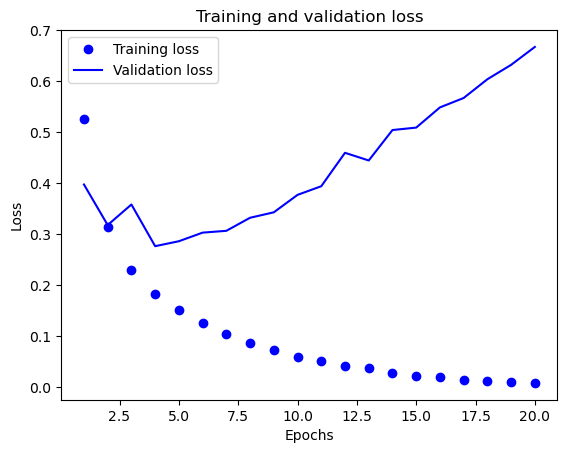

In [63]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

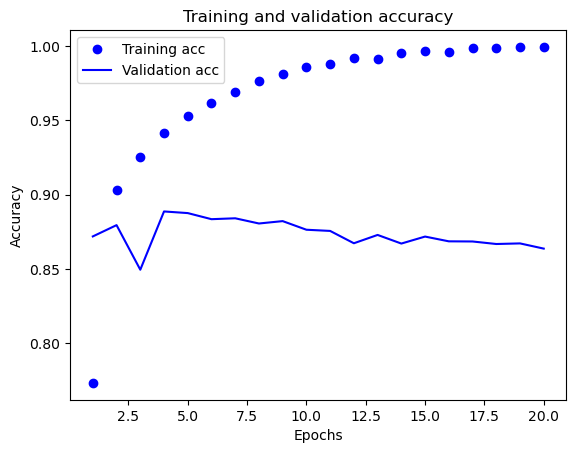

In [64]:
plt.clf()  ## clears the entire current figure with all its axes
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [65]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 8ms/step - loss: 0.4429 - accuracy: 0.8198
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2538 - accuracy: 0.9097
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.1959 - accuracy: 0.9290
Epoch 4/4
782/782 [==============================] - 5s 6ms/step - loss: 0.3320 - accuracy: 0.8710


In [66]:
results

[0.3319702446460724, 0.870959997177124]

### Using a trained model to generate predictions on new data

In [67]:
model.predict(x_test[0:10])

1/1 [==============================] - 0s 108ms/step


array([[0.12803313],
       [0.9994582 ],
       [0.33285326],
       [0.77357   ],
       [0.890155  ],
       [0.6623222 ],
       [0.99888366],
       [0.0037173 ],
       [0.9286195 ],
       [0.97146964]], dtype=float32)

## Classifying newswires: A multiclass classification example

## The Reuters dataset

**Loading the Reuters dataset**

In [35]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [36]:
len(train_data)

8982

In [37]:
len(test_data)

2246

In [38]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [72]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

**For a list of topics, refer to https://github.com/SteffenBauer/KerasTools/tree/master/Reuters_Analysis**

In [73]:
train_labels[0:10]

array([ 3,  4,  3,  4,  4,  4,  4,  3,  3, 16], dtype=int64)

### Preparing the data

**Encoding the input data**

In [75]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [79]:
x_train.shape

(8982, 10000)

In [80]:
x_test.shape

(2246, 10000)

**Encoding the labels**

In [81]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [82]:
train_labels[0]

3

In [83]:
train_labels[2]

3

In [84]:
y_train[0:10]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 

In [85]:
y_train.shape

(8982, 46)

In [86]:
## A build-in in Keras
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [87]:
y_train.shape

(8982, 46)

### Building your model

In [88]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [89]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

In [90]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [91]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 74ms/step - loss: 2.7487 - accuracy: 0.5193 - val_loss: 1.8138 - val_accuracy: 0.6360
Epoch 2/20
16/16 [==============================] - 0s 19ms/step - loss: 1.4904 - accuracy: 0.6897 - val_loss: 1.3802 - val_accuracy: 0.7020
Epoch 3/20
16/16 [==============================] - 0s 18ms/step - loss: 1.1084 - accuracy: 0.7583 - val_loss: 1.2063 - val_accuracy: 0.7350
Epoch 4/20
16/16 [==============================] - 0s 18ms/step - loss: 0.8796 - accuracy: 0.8141 - val_loss: 1.0563 - val_accuracy: 0.7870
Epoch 5/20
16/16 [==============================] - 0s 18ms/step - loss: 0.7033 - accuracy: 0.8542 - val_loss: 0.9783 - val_accuracy: 0.8010
Epoch 6/20
16/16 [==============================] - 0s 18ms/step - loss: 0.5650 - accuracy: 0.8860 - val_loss: 0.9502 - val_accuracy: 0.8030
Epoch 7/20
16/16 [==============================] - 0s 19ms/step - loss: 0.4596 - accuracy: 0.9028 - val_loss: 0.9404 - val_accuracy: 0.7970
Epoch 8/20
16

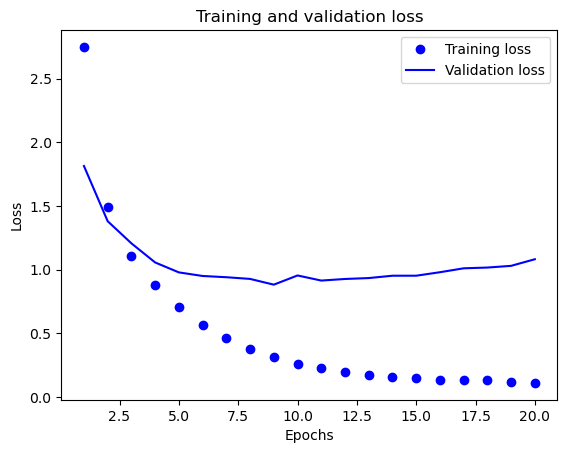

In [92]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

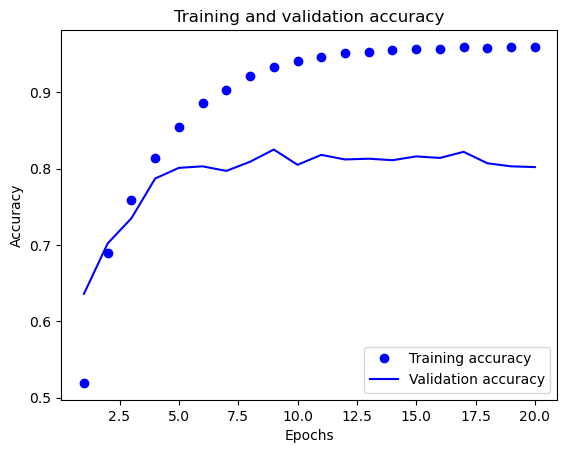

In [93]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [94]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 15ms/step - loss: 2.5783 - accuracy: 0.5553
Epoch 2/9
18/18 [==============================] - 0s 15ms/step - loss: 1.3931 - accuracy: 0.7073
Epoch 3/9
18/18 [==============================] - 0s 16ms/step - loss: 1.0368 - accuracy: 0.7738
Epoch 4/9
18/18 [==============================] - 0s 14ms/step - loss: 0.8120 - accuracy: 0.8246
Epoch 5/9
18/18 [==============================] - 0s 14ms/step - loss: 0.6461 - accuracy: 0.8621
Epoch 6/9
18/18 [==============================] - 0s 15ms/step - loss: 0.5089 - accuracy: 0.8946
Epoch 7/9
18/18 [==============================] - 0s 15ms/step - loss: 0.4041 - accuracy: 0.9137
Epoch 8/9
18/18 [==============================] - 0s 15ms/step - loss: 0.3270 - accuracy: 0.9303
Epoch 9/9
71/71 [==============================] - 1s 6ms/step - loss: 0.9475 - accuracy: 0.7930


In [90]:
results

[0.9408175349235535, 0.7983080744743347]

In [95]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 6ms/step - loss: 0.9475 - accuracy: 0.7930


[0.9474853873252869, 0.792965292930603]

**The accuracy means good or bad?** \
**Try a random guess**

In [88]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)

In [89]:
hits_array

array([False, False, False, ..., False,  True, False])

In [90]:
hits_array.mean()

0.18210151380231523

In [91]:
predictions = model.predict(x_test)

71/71 [==============================] - 1s 6ms/step


In [92]:
predictions[0].shape

(46,)

In [93]:
predictions[0]

array([3.07390059e-04, 1.12664937e-04, 7.82665120e-06, 4.64849740e-01,
       5.16624093e-01, 2.02807714e-04, 5.33109851e-05, 1.05064944e-04,
       1.53054961e-03, 7.93531872e-05, 9.21637402e-05, 3.74462223e-04,
       1.66373211e-04, 3.81184916e-04, 4.13290196e-04, 1.48490391e-04,
       1.76018826e-03, 7.51828018e-04, 1.17057505e-04, 4.70370927e-04,
       2.70537823e-03, 5.50450291e-03, 6.45348482e-05, 2.34296152e-04,
       3.49555958e-05, 6.12369840e-05, 2.88858769e-06, 3.43754800e-05,
       4.31031513e-05, 2.48562690e-04, 7.24590092e-04, 3.95328389e-04,
       3.88893459e-05, 6.48449131e-05, 7.92055944e-05, 3.12655211e-05,
       5.81180175e-05, 1.04819454e-04, 3.73391485e-05, 4.67016536e-04,
       5.90839882e-05, 2.61170935e-04, 2.90342014e-05, 9.88122119e-05,
       1.86616089e-05, 4.96805951e-05], dtype=float32)

In [94]:
np.sum(predictions[0])

0.99999994

In [95]:
np.argmax(predictions[0])

4

### A different way to handle the labels and the loss (as in the MNIST data)

In [96]:
y_train = train_labels
y_test = test_labels

In [97]:
y_train.shape

(8982,)

In [98]:
y_train[0]

3

In [99]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [100]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [101]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]


In [102]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 39ms/step - loss: 2.8469 - accuracy: 0.4882 - val_loss: 1.8800 - val_accuracy: 0.6280
Epoch 2/20
16/16 [==============================] - 0s 18ms/step - loss: 1.4980 - accuracy: 0.6972 - val_loss: 1.3334 - val_accuracy: 0.7110
Epoch 3/20
16/16 [==============================] - 0s 18ms/step - loss: 1.0667 - accuracy: 0.7808 - val_loss: 1.1541 - val_accuracy: 0.7440
Epoch 4/20
16/16 [==============================] - 0s 19ms/step - loss: 0.8313 - accuracy: 0.8255 - val_loss: 1.0231 - val_accuracy: 0.7920
Epoch 5/20
16/16 [==============================] - 0s 19ms/step - loss: 0.6652 - accuracy: 0.8623 - val_loss: 0.9557 - val_accuracy: 0.8030
Epoch 6/20
16/16 [==============================] - 0s 18ms/step - loss: 0.5286 - accuracy: 0.8934 - val_loss: 0.9128 - val_accuracy: 0.8120
Epoch 7/20
16/16 [==============================] - 0s 19ms/step - loss: 0.4275 - accuracy: 0.9123 - val_loss: 0.8978 - val_accuracy: 0.8180
Epoch 8/20
16

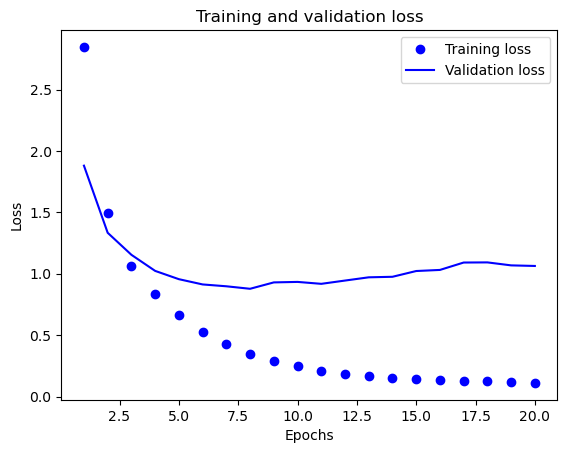

In [103]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### The importance of having sufficiently large intermediate layers

In [104]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))


Epoch 1/20
63/63 [==============================] - 2s 16ms/step - loss: 2.9078 - accuracy: 0.3215 - val_loss: 2.2452 - val_accuracy: 0.4360
Epoch 2/20
63/63 [==============================] - 1s 11ms/step - loss: 1.8461 - accuracy: 0.5133 - val_loss: 1.6512 - val_accuracy: 0.6240
Epoch 3/20
63/63 [==============================] - 1s 11ms/step - loss: 1.3982 - accuracy: 0.6706 - val_loss: 1.4254 - val_accuracy: 0.6740
Epoch 4/20
63/63 [==============================] - 1s 11ms/step - loss: 1.1588 - accuracy: 0.7263 - val_loss: 1.3278 - val_accuracy: 0.7030
Epoch 5/20
63/63 [==============================] - 1s 11ms/step - loss: 1.0130 - accuracy: 0.7598 - val_loss: 1.3067 - val_accuracy: 0.7070
Epoch 6/20
63/63 [==============================] - 1s 11ms/step - loss: 0.9070 - accuracy: 0.7801 - val_loss: 1.2798 - val_accuracy: 0.7120
Epoch 7/20
63/63 [==============================] - 1s 11ms/step - loss: 0.8244 - accuracy: 0.7977 - val_loss: 1.2887 - val_accuracy: 0.7120
Epoch 8/20
63

## Predicting house prices: A regression example

### The Boston Housing Price dataset

In [105]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [106]:
train_data.shape

(404, 13)

In [107]:
test_data.shape

(102, 13)

In [108]:
train_targets[0:10]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

**Normalizing the data**

In [109]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Validating your approach using K-fold validation

In [110]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [111]:
len(train_data)

404

**Saving the validation logs at each fold**

In [112]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [113]:
type(history.history['val_mae'])

list

In [114]:
mae_history

[21.09128761291504,
 17.162874221801758,
 12.094169616699219,
 8.713750839233398,
 6.934635162353516,
 5.681881904602051,
 4.673924922943115,
 4.142789840698242,
 3.8304598331451416,
 3.551250696182251,
 3.2874462604522705,
 3.3418147563934326,
 3.339693069458008,
 3.112542152404785,
 3.303811550140381,
 2.9353365898132324,
 2.937070608139038,
 2.882833957672119,
 2.7716119289398193,
 2.813258171081543,
 2.747007369995117,
 2.7732067108154297,
 2.705348253250122,
 2.698131561279297,
 2.636970043182373,
 2.621128797531128,
 2.67096209526062,
 2.745816707611084,
 2.593304395675659,
 2.5905978679656982,
 2.608654737472534,
 2.640423536300659,
 2.542990207672119,
 2.6519343852996826,
 2.485628604888916,
 2.7002170085906982,
 2.528038501739502,
 2.4330055713653564,
 2.553884744644165,
 2.4225051403045654,
 2.5140562057495117,
 2.54372239112854,
 2.3896162509918213,
 2.3946774005889893,
 2.4662842750549316,
 2.438204765319824,
 2.424027681350708,
 2.4101028442382812,
 2.3723666667938232,
 2.

In [115]:
len(all_mae_histories)

4

In [116]:
len(all_mae_histories[0])

500

In [117]:
## compute mean over 4 sections in the cross-validation by list comprehension
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [118]:
[x[0] for x in all_mae_histories]

[18.552396774291992, 19.30945587158203, 18.87933921813965, 21.09128761291504]

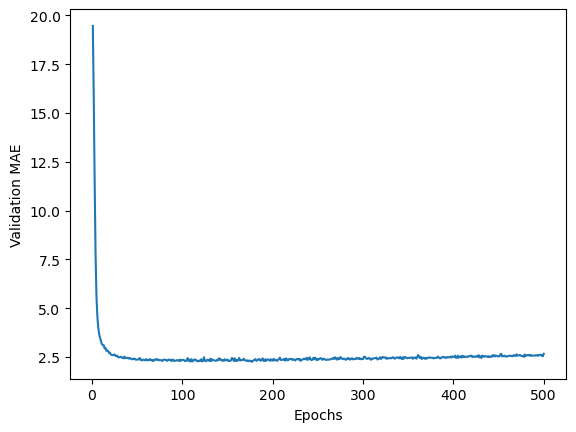

In [119]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

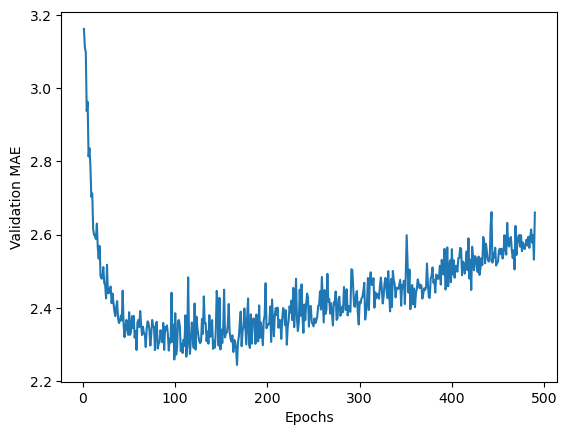

In [120]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [121]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 7ms/step - loss: 14.3316 - mae: 2.5031


In [122]:
test_mae_score

2.5030741691589355